In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('/Users/bhautik/Downloads/stack-overflow-developer-survey-2024/survey_results_public.csv')
data.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


## Data Cleaning and Manipulation
- Let's start by having a look at the columns of our data

In [4]:
data.columns

Index(['ResponseId', 'MainBranch', 'Age', 'Employment', 'RemoteWork', 'Check',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       ...
       'JobSatPoints_6', 'JobSatPoints_7', 'JobSatPoints_8', 'JobSatPoints_9',
       'JobSatPoints_10', 'JobSatPoints_11', 'SurveyLength', 'SurveyEase',
       'ConvertedCompYearly', 'JobSat'],
      dtype='object', length=114)

- Now from all the columns we have we will only use 5 columns to predict the salary
- Columns we will use are 'Country', 'EdLevel', 'YearsCodePro', 'Employment', 'ConvertedComp'

In [5]:
# choose column we will use for prediction
data = data[['Country', 'EdLevel', 'YearsCodePro', 'Employment', 'ConvertedCompYearly']]
# rename 'ConvertedCompYearly' to 'Salary'
data = data.rename({'ConvertedCompYearly': 'Salary'}, axis=1)
data.head()

,Country,EdLevel,YearsCodePro,Employment,Salary
0,United States of America,Primary/elementary school,NaN,"Employed, full-time",NaN
1,United Kingdom of Great Britain and Northern I...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",17,"Employed, full-time",NaN
2,United Kingdom of Great Britain and Northern I...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",27,"Employed, full-time",NaN
3,Canada,Some college/university study without earning ...,NaN,"Student, full-time",NaN
4,Norway,"Secondary school (e.g. American high school, G...",NaN,"Student, full-time",NaN


- Let's have a look at the information of our new column

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65437 entries, 0 to 65436
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       58930 non-null  object 
 1   EdLevel       60784 non-null  object 
 2   YearsCodePro  51610 non-null  object 
 3   Employment    65437 non-null  object 
 4   Salary        23435 non-null  float64
dtypes: float64(1), object(4)
memory usage: 2.5+ MB


- Now let's check for missing values in our new data

In [7]:
# check for missng values
data.isnull().sum()

Country          6507
EdLevel          4653
YearsCodePro    13827
Employment          0
Salary          42002
dtype: int64

-Inorder for our  model to predict, we should use our data that contains salary values. Threfore, we'll choose the data in which there are no any null values in the 'Salary' column

In [8]:
# select 'Salary' column with no null values
data = data[data['Salary'].notnull()]
data.isnull().sum()

Country          0
EdLevel          0
YearsCodePro    90
Employment       0
Salary           0
dtype: int64

- After we have selected the column with no null values for the 'Salary' column we still can see there are some msiing values in the 'YearsCodePro' and 'Employent' columns. We will drop the rows with null values

In [9]:
# drop rows with null values
data = data.dropna()
# check null values
data.isnull().sum()

Country         0
EdLevel         0
YearsCodePro    0
Employment      0
Salary          0
dtype: int64

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23345 entries, 72 to 41187
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       23345 non-null  object 
 1   EdLevel       23345 non-null  object 
 2   YearsCodePro  23345 non-null  object 
 3   Employment    23345 non-null  object 
 4   Salary        23345 non-null  float64
dtypes: float64(1), object(4)
memory usage: 1.1+ MB


- Now, we'll only select values 'Employed full-time' columns in the 'Employment' column

In [11]:
data['Employment'].unique()

array(['Employed, full-time;Student, full-time;Independent contractor, freelancer, or self-employed;Employed, part-time',
       'Employed, full-time',
       'Independent contractor, freelancer, or self-employed',
       'Employed, full-time;Student, part-time',
       'Employed, full-time;Independent contractor, freelancer, or self-employed',
       'Employed, full-time;Student, full-time',
       'Student, part-time;Employed, part-time',
       'Student, full-time;Independent contractor, freelancer, or self-employed',
       'Retired',
       'Independent contractor, freelancer, or self-employed;Employed, part-time',
       'Not employed, but looking for work', 'Employed, part-time',
       'Employed, full-time;Independent contractor, freelancer, or self-employed;Student, part-time',
       'Employed, full-time;Independent contractor, freelancer, or self-employed;Employed, part-time',
       'Student, full-time;Employed, part-time',
       'Employed, full-time;Employed, part-time',


In [12]:
# filter 'Employed full-time' values in the 'Employment' column
data = data[data['Employment'] == 'Employed, full-time']

# drop the 'Employment' column
data = data.drop('Employment', axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17527 entries, 374 to 41185
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       17527 non-null  object 
 1   EdLevel       17527 non-null  object 
 2   YearsCodePro  17527 non-null  object 
 3   Salary        17527 non-null  float64
dtypes: float64(1), object(3)
memory usage: 684.6+ KB


- Now let's have a look at the value counts for the 'Country' column

In [13]:
data['Country'].value_counts()

Country
United States of America                                3903
Germany                                                 1491
United Kingdom of Great Britain and Northern Ireland    1141
Ukraine                                                 1017
India                                                    836
                                                        ... 
Kosovo                                                     1
Oman                                                       1
Guyana                                                     1
Angola                                                     1
Mali                                                       1
Name: count, Length: 155, dtype: int64

- A the countries with only '1' vaue counts are of less use to our model we will come up with a solution

In [14]:
# function to the shorten the 'Country' column based on the unique values and count
def shorten_categories(categories, cutoff):
    categorical_map = {}
    for i in range(len(categories)):
        if categories.values[i] >= cutoff:
            categorical_map[categories.index[i]] = categories.index[i]
        else:
            categorical_map[categories.index[i]] = 'Other'
    return categorical_map

In [15]:
# applying the shorten_categories function
country =  data['Country'].value_counts()
country_map = shorten_categories(country, 400)
data['Country'] = data['Country'].map(country_map)
data['Country'].value_counts()

Country
Other                                                   5628
United States of America                                3903
Germany                                                 1491
United Kingdom of Great Britain and Northern Ireland    1141
Ukraine                                                 1017
India                                                    836
France                                                   719
Canada                                                   684
Brazil                                                   457
Spain                                                    431
Italy                                                    414
Netherlands                                              406
Australia                                                400
Name: count, dtype: int64

## Data Visualization
- let's visualize our data using the boxplot to check for outliers

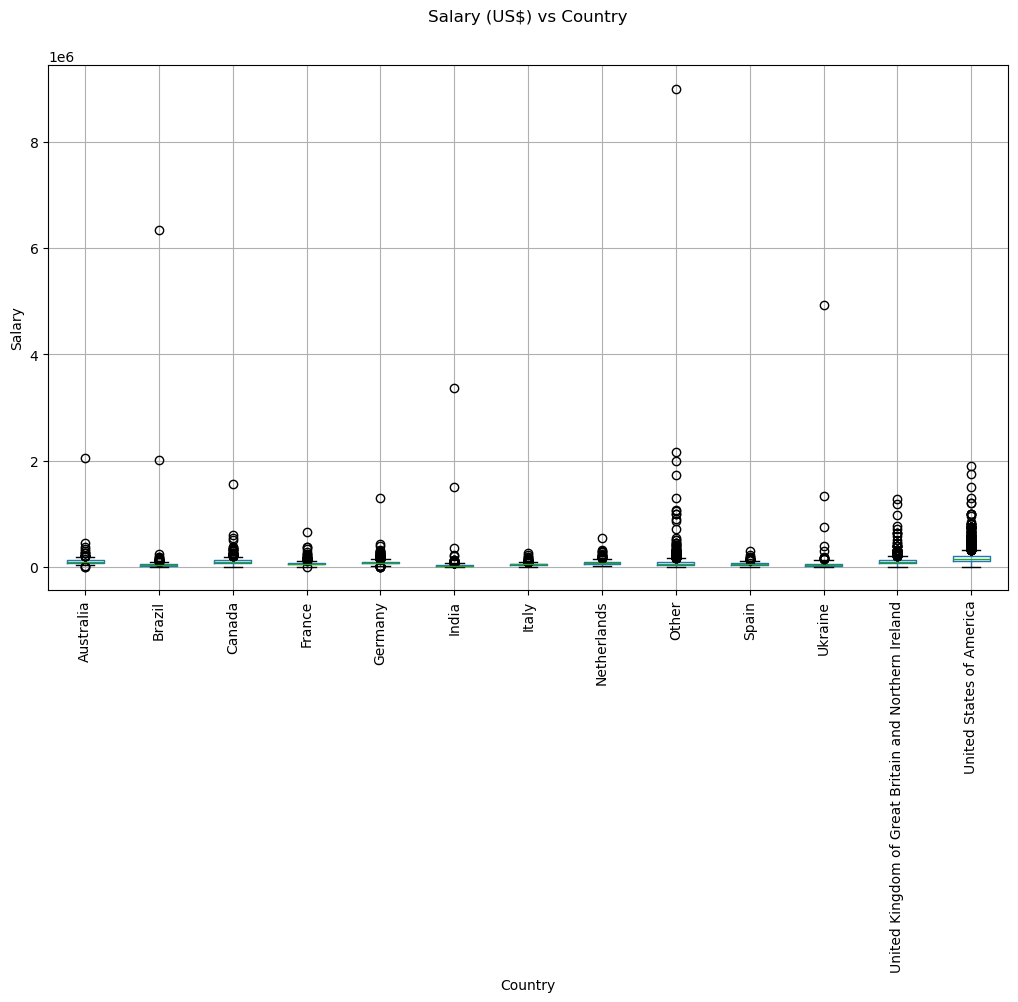

In [16]:
# create a boxplot
fig, ax = plt.subplots(1,1, figsize=(12, 7))
data.boxplot('Salary', 'Country', ax=ax)
plt.suptitle('Salary (US$) vs Country')
plt.title('')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show()

- Now, we'll filter the data with Salary in teh range of 10000 to 250000 and excluding the 'Other' category from the 'Country' column

In [17]:
data = data[(data['Salary'] >= 10000) & (data['Salary'] <= 250000) & (data['Country'] != 'Other')]

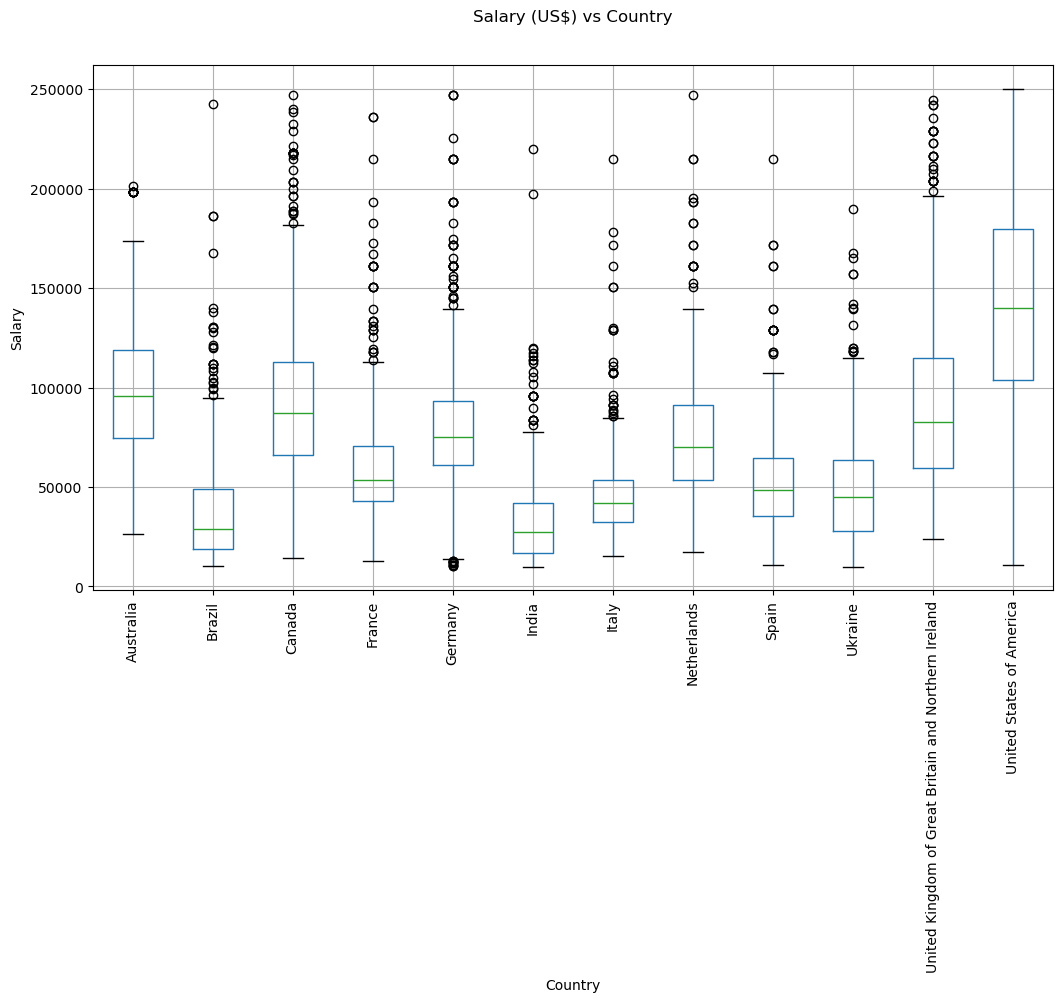

In [18]:
# boxplot after filtering
fig, ax = plt.subplots(1 ,1 ,figsize=(12, 7))
data.boxplot('Salary', 'Country', ax=ax)
plt.suptitle('Salary (US$) vs Country')
plt.title('')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show()

- Now, let's have a look at the unique values for the 'YearsCodePro' column

## Data Cleaning and Preprocessing

In [19]:
data['YearsCodePro'].unique()

array(['18', '25', '30', '50', '27', '1', '15', '11', '23', '17', '10',
       '8', '12', '26', '40', '4', '9', '22', '28', '20', '16', '13', '3',
       '35', '5', '31', '41', '36', '6', '14', '7', 'Less than 1 year',
       '24', '2', '38', '32', '21', '19', '34', '29', '43', '33', '45',
       '37', '44', '42', '39', '46', '49', '48', '47'], dtype=object)

- As you can see the 'YearsCodePro' column contains string and also there are some tesxts dispalyed as 'Less than 1 year' and 'More than 50 years' we will clean the 'YearsCodePro' column next

In [20]:
# function to clean the 'YearsCodePro' column
def clean_experience(x):
    if x == 'More than 50 years':
        return 50
    if x == 'Less than 1 year':
        return 0.5
    return float(x)

data['YearsCodePro'] = data['YearsCodePro'].apply(clean_experience)

- Now, let's have a look at the unique values for teh 'EdLevel' column

In [21]:
data['EdLevel'].unique()

array(['Professional degree (JD, MD, Ph.D, Ed.D, etc.)',
       'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Some college/university study without earning a degree',
       'Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
       'Associate degree (A.A., A.S., etc.)', 'Primary/elementary school',
       'Something else'], dtype=object)

- Now, we will clean the 'EdLevel' column

In [22]:
# function to clean the 'EdLevel' column
def clean_education(x):
    if "Bachelor’s degree" in x:
        return "Bachelor’s degree"
    if "Master’s degree" in x:
        return "Master’s degree"
    if "Professional degree" in x or 'Associate degree' in x:
        return 'Post grad'
    return 'Less than a Bachelors'

data['EdLevel'] = data['EdLevel'].apply(clean_education)

In [23]:
# unique values in 'EdLevel' colum after cleaning
data['EdLevel'].unique()

array(['Post grad', 'Master’s degree', 'Less than a Bachelors',
       'Bachelor’s degree'], dtype=object)

- Now, let's convert teh categorical columns to numerical because our model accepts numerical values

In [24]:
data['EdLevel'].shape

(10712,)

In [25]:
# import necessary lirary
from sklearn.preprocessing import LabelEncoder
le_education = LabelEncoder()
# label encode the 'EdLevel' column
data['EdLevel'] = le_education.fit_transform(data['EdLevel'])
data['EdLevel'].unique()

array([3, 2, 1, 0])

In [26]:
le_country = LabelEncoder()
# label encode the 'Country' column
data['Country'] = le_country.fit_transform(data['Country'])
data['Country'].unique()

array([10, 11,  3,  4,  1,  2,  6,  5,  9,  8,  7,  0])

In [28]:
# save cleaned data
data.to_csv('/Users/bhautik/Documents/GitHub/Salary-Prediction/cleaned_data.csv', index=False)

## Model Training
- Let's select our feature and target variables

In [29]:
X = data.drop('Salary', axis=1)
y = data['Salary']

# print shape of X and y
print('Shape of X:', X.shape)
print('Shape of y:', y.shape)

Shape of X: (10712, 3)
Shape of y: (10712,)


In [30]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10712 entries, 392 to 41185
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       10712 non-null  int64  
 1   EdLevel       10712 non-null  int64  
 2   YearsCodePro  10712 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 334.8 KB


- Before training we should scale our data. we'll scale our data using the StandardScaler from sklearn library

In [31]:
# set columns for our feature variable(X)
X.columns = ['Country', 'EdLevel', 'YearsCodePro']

### Find best model using GridSearchCV

In [32]:
# import GridSearchCV library and ShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit

# import algorithms
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'fit_intercept': [True, False],
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['friedman_mse', 'squared_error', 'poisson', 'absolute_error'],
                'splitter': ['best','random']
            }
        },
        'random_forest': {
            'model': RandomForestRegressor(),
            'params': {
                'max_depth' : [None, 2,4,6,8,10,12]
            }
        }
    }

    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X, y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])

find_best_model_using_gridsearchcv(X, y)

,model,best_score,best_params
0,linear_regression,0.301147,{'fit_intercept': True}
1,lasso,0.301147,"{'alpha': 2, 'selection': 'random'}"
2,decision_tree,0.546665,"{'criterion': 'absolute_error', 'splitter': 'r..."
3,random_forest,0.594472,{'max_depth': 8}


- As you can see the best model to use is the RandomForestRegressor. So, we'll fit our data using the RandomForestRegressor algorithm

In [33]:
model = RandomForestRegressor()
model.fit(X, y)
y_pred = model.predict(X)
y_pred

array([ 98872.87413889, 103287.39578427, 148220.44138868, ...,
       131135.33485142, 163709.24459128, 154423.59395483])

- Now, let's have a look at our metrics

In [34]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(y, y_pred)
mae = mean_absolute_error(y, y_pred)
error = np.sqrt(mse)
print('Mean Squared Error: ', mse)
print('Mean Absolute Error: ', mae)
print(f"error: {error:.02f}")

Mean Squared Error:  1011668532.8290684
Mean Absolute Error:  22885.652298755882
error: 31806.74


- Now, let's try an example

In [35]:
# test data
X_test = np.array([["United States of America", 'Master’s degree', 15 ]])
X_test

array([['United States of America', 'Master’s degree', '15']],
      dtype='<U24')

- now, let's transform the inputs to their respective number format

In [36]:
# transform each value to numerical form
X_test[:, 0] = le_country.transform(X_test[:, 0])
X_test[:, 1] = le_education.transform(X_test[:, 1])
X_test = X_test.astype(float)
X_test

array([[11.,  2., 15.]])

- Now, let's predict the salary based on our new test data

In [37]:
# predict salary
y_pred = model.predict(X_test)
y_pred[0]

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


152451.9434097443

## Save Model and Important Data

In [38]:
import pickle

# important data
imp_data = {'model': model, 'le_country': le_country, 'le_education': le_education}
# write on imp_data
with open('/Users/bhautik/Documents/GitHub/Salary-Prediction/model.pkl', 'wb') as file:
  pickle.dump(imp_data, file)

- Now, let's read the saved file then predict using our previous data (X_test)

In [40]:
with open('/Users/bhautik/Documents/GitHub/Salary-Prediction/model.pkl', 'rb') as file:
  imp_data = pickle.load(file)

model_loaded = imp_data['model']
le_country = imp_data['le_country']
le_education = imp_data['le_education']

In [41]:
# predict
y_pred = model_loaded.predict(X_test)
y_pred

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([152451.94340974])

- As you can see the loaded model prediction is the same as the first prediction we used on X_test before saving the model